# Лабораторная работа 1 : Линейные методы классификации

In [1]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.linear_model import LogisticRegression as lr
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import itertools
from scipy import linalg as npl
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd

In [2]:
### plot methods

n = 500

def task2(x, y, model, name):
    model.fit(x,y)
    x_min, x_max = x[:, 0].min() - 0.5 , x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5 , x[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max,n), np.linspace(y_min, y_max,n))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z)
    plt.scatter(x[:, 0], x[:, 1], c = y,s = 10)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'{name}')
    plt.show()
    res = cm(y,model.predict(x))
    disp = cmd(confusion_matrix=res)
    disp.plot()
    
def task3(pair, model, x, y, labelPair):
    model.fit(x,y)
    y_pred = model.predict(x)
    x_min, x_max = x[:, pair[0]].min() - 1, x[:, pair[0]].max() + 1
    y_min, y_max = x[:, pair[1]].min() - 1, x[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),np.linspace(y_min, y_max, n))
    tp = (y == model.predict(x))
    tp0, tp1 = tp[y == 1], tp[y == 2]
    XX = X[:,[pair[0],pair[1]]]
    X0, X1 = XX[y == 1], XX[y == 2]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], '.', color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], 'X', color='darkred')
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], '.', color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], 'X', color='darkblue')
    plt.xlabel(f'{labelPair[0]}')
    plt.ylabel(f'{labelPair[1]}')
    plt.xlim(xx.min(), xx.max())
    plt.title('LDA')
    plt.show()
    
def task4(x,y):
    x_min, x_max = x[:, 0].min() - 0.5 , x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5 , x[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max,n), np.linspace(y_min, y_max,n))
    Z = []
    for i in np.c_[xx.ravel(), yy.ravel()]:
        Z.append(qda_test(i))
    Z = np.array(Z).reshape(xx.shape)
    plt.contour(xx, yy, Z)
    plt.scatter(x[:, 0], x[:, 1], c = y,s = 10)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title('QDA-test')
    y_pred = []
    for xxx in x:
        y_pred.append(qda_test(xxx))
    res = cm(y,np.array(y_pred))
    disp = cmd(confusion_matrix=res)
    disp.plot()

## Задание 1

In [3]:
iris = datasets.load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.loc[(df.target==0),'target_'] = 'iris-setosa'
df.loc[(df.target==1),'target_'] = 'iris-versicolor'
df.loc[(df.target==2),'target_'] = 'iris-virginica'
dfwn = df.drop(columns=['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_
0,5.1,3.5,1.4,0.2,0.0,iris-setosa
1,4.9,3.0,1.4,0.2,0.0,iris-setosa
2,4.7,3.2,1.3,0.2,0.0,iris-setosa
3,4.6,3.1,1.5,0.2,0.0,iris-setosa
4,5.0,3.6,1.4,0.2,0.0,iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,iris-virginica
146,6.3,2.5,5.0,1.9,2.0,iris-virginica
147,6.5,3.0,5.2,2.0,2.0,iris-virginica
148,6.2,3.4,5.4,2.3,2.0,iris-virginica


все:

In [4]:
corr = dfwn.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


setosa:

In [5]:
corr = dfwn[dfwn.target_=='iris-setosa'].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.742547,0.267176,0.278098
sepal width (cm),0.742547,1.000000,0.177700,0.232752
petal length (cm),0.267176,0.177700,1.000000,0.331630
petal width (cm),0.278098,0.232752,0.331630,1.000000


versicolor:

In [6]:
corr = dfwn[dfwn.target_=='iris-versicolor'].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.525911,0.754049,0.546461
sepal width (cm),0.525911,1.000000,0.560522,0.663999
petal length (cm),0.754049,0.560522,1.000000,0.786668
petal width (cm),0.546461,0.663999,0.786668,1.000000


virginica:

In [7]:
corr = dfwn[dfwn.target_=='iris-virginica'].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.457228,0.864225,0.281108
sepal width (cm),0.457228,1.000000,0.401045,0.537728
petal length (cm),0.864225,0.401045,1.000000,0.322108
petal width (cm),0.281108,0.537728,0.322108,1.000000


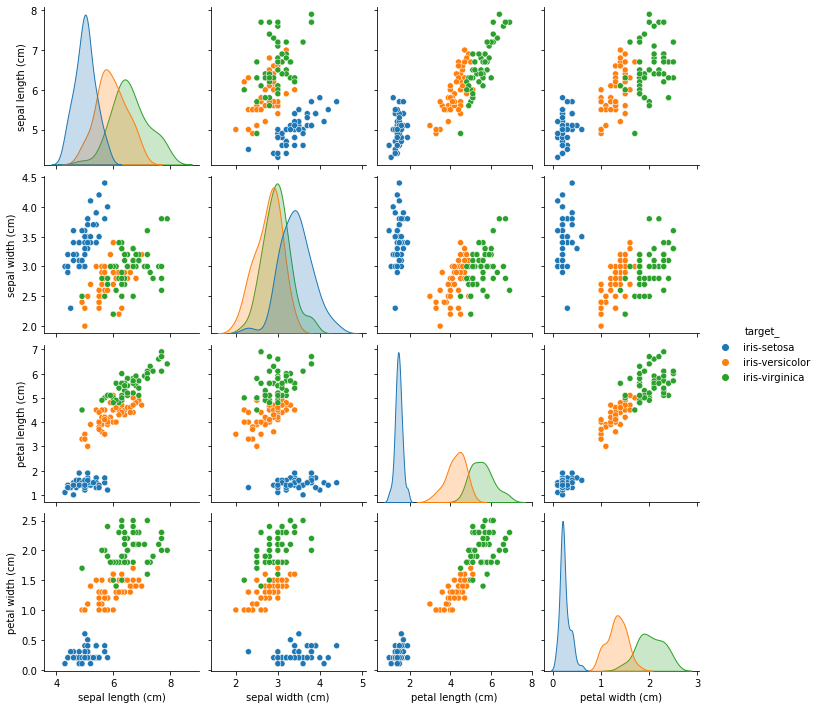

In [8]:
sns.pairplot(dfwn, hue = 'target_')

наимение различимые классы: virginica и versicolor

дальше работать будем с ними

## Задание 2

переменные для построения : petal length и petal width

In [9]:
X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['target']
print(type(X))

<class 'numpy.ndarray'>


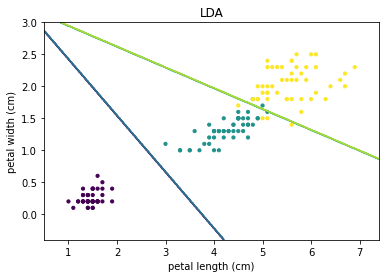

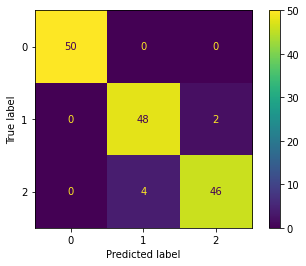

In [10]:
LDA_model = lda()
task2(X,y,LDA_model,"LDA")

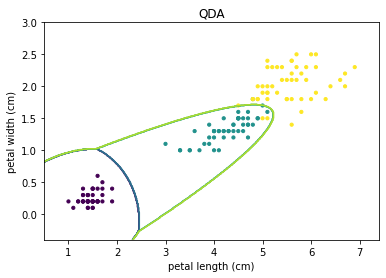

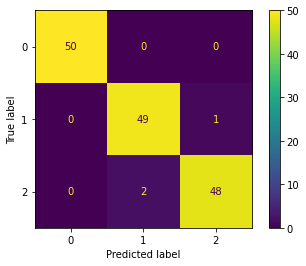

In [11]:
QDA_model = qda()
task2(X,y,QDA_model,"QDA")

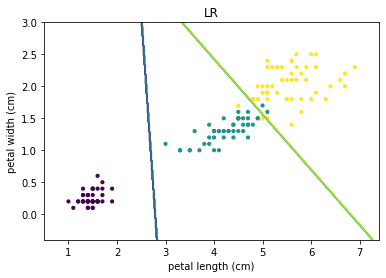

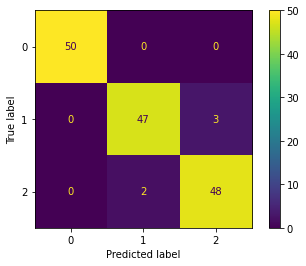

In [12]:
LR_model = lr()
task2(X,y,LR_model,"LR")

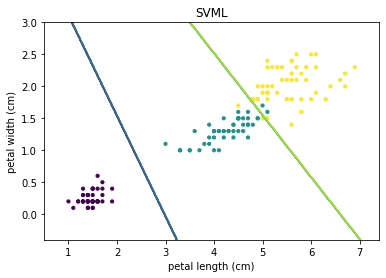

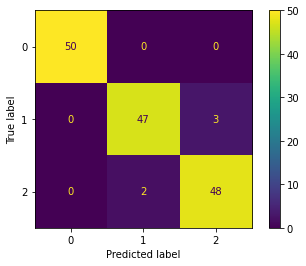

In [13]:
SVML_model = svm.SVC(kernel='linear')
task2(X,y,SVML_model,"SVML")

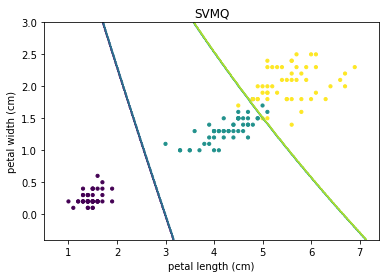

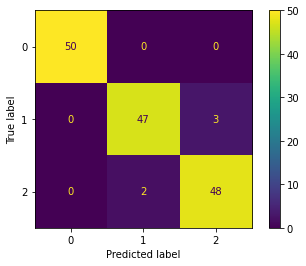

In [14]:
SVMQ_model = svm.SVC(kernel='poly', degree=2)
task2(X,y,SVMQ_model,"SVMQ")

## Задание 3

In [15]:
X = dfwn[dfwn['target_'] != 'iris-setosa'].drop(columns='target_').values
y = df[df['target_'] != 'iris-setosa']['target'].values

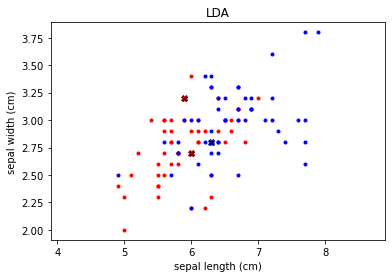

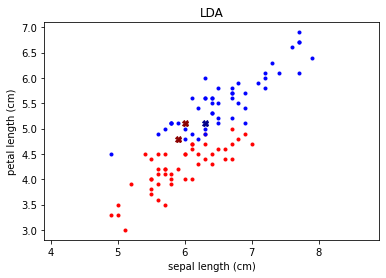

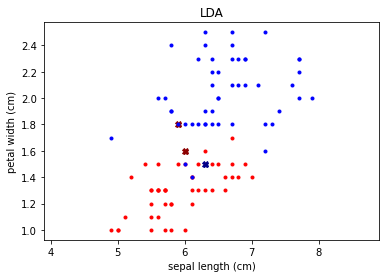

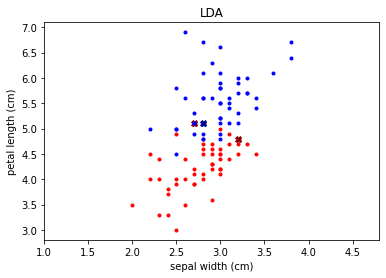

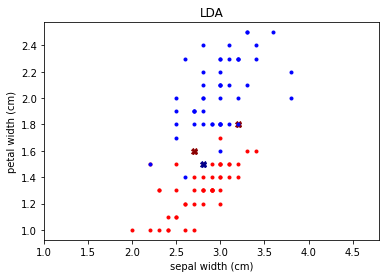

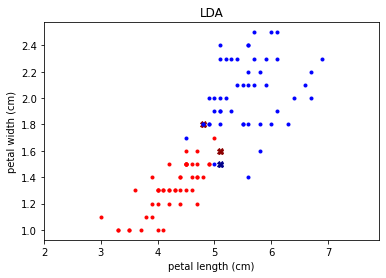

In [16]:
for pair in itertools.combinations(list(range(0,4)), 2):
    task3(pair,LDA_model, X, y, [df.columns[pair[0]], df.columns[pair[1]]])

Как видно, построение LDA модели с помощью всех переменных дает лучший результат, 
по сравнению с построением лишь по petal length и petal width. Ошибок 3 вместо 6.

## Задание 4

переменные для построения : petal length и petal width

In [17]:
X = df[df['target_'] != 'iris-setosa'][['petal length (cm)', 'petal width (cm)']]
y = df[df['target_'] != 'iris-setosa']['target']
y = y - 1

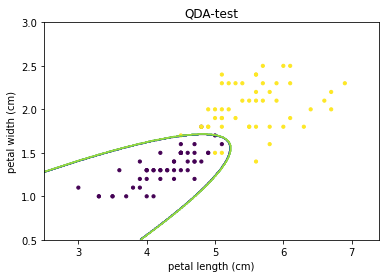

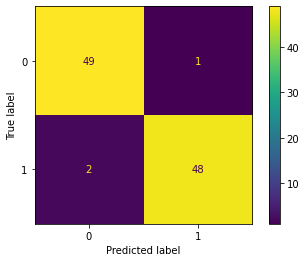

In [18]:
sigma1 = X[y == 0].cov().values
mean1 = X[y == 0].mean().values
sigma2 = X[y == 1].cov().values
mean2 = X[y == 1].mean().values

def qda_test(x):
    Q2 = np.dot((x-mean2), np.dot(npl.inv(sigma2), (x-mean2)))
    Q1 = np.dot((x-mean1), np.dot(npl.inv(sigma1), (x-mean1)))
    r = (Q2 - Q1) / 2 + np.log(np.sqrt(np.abs(npl.det(sigma2))) / np.sqrt(np.abs(npl.det(sigma1))))
    if r > 0:
        return  0
    if r <= 0:
        return 1
    
task4(X.values,y.values)

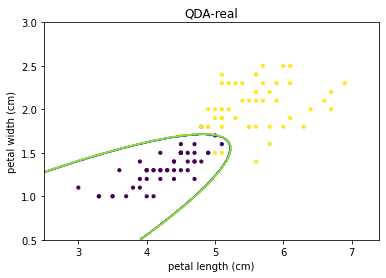

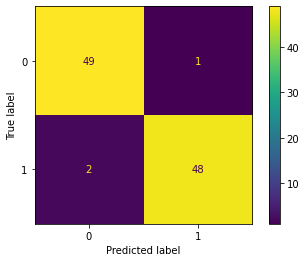

In [19]:
QDA_model = qda()
X=X.values
task2(X,y.values,QDA_model,"QDA-real")

Как видно, результаты аналогичные.